In [1]:
from Cardio_data_wrangler import Cardio_data
from ModelTester import ModelTester
import pandas as pd

In [2]:
cardio_data = pd.read_csv("../Laboration_1_Medical_Prediction/Data/cardio_train.csv", delimiter=";")
cardio_data.drop("id", axis=1, inplace=True)
bmi_values = [54, 18]
ap_hi_ap_lo = {"ap_hi": [160, 190], "ap_lo": [100, 140]}
scoring_metrics = ["f1", "precision", "recall"]
path_save_results = "../Laboration_1_Medical_Prediction/Data/model_results.csv"
encode_columns = [["ap_hi", "ap_lo", "height", "weight", "BMI"],]
param_grids = {
    "SVM_Stdz": {
        "model__C": [0.1, 1, 10],  
        "model__kernel": ["rbf", "poly"],
        "model__gamma": ["scale", "auto"], 
        "model__degree": [3] 
    },
    "SVM_Norm": {
        "model__C": [0.1, 1, 10],  
        "model__kernel": ["rbf", "poly"],
        "model__gamma": ["scale", "auto"],
        "model__degree": [3]  
    },
    "Logistic Regression_Stdz": {
        "model__C": [0.1, 1, 10],  
        "model__solver": ["saga"],
        "model__max_iter" : [200, 500, 1000],  
        "model__penalty": ["elasticnet"],
        "model__l1_ratio": [0.1, 0.5, 0.9] 
    },
    "Logistic Regression_Norm": {
        "model__C": [0.1, 1, 10],  
        "model__solver": ["saga"],
        "model__max_iter" : [200, 500, 1000],
        "model__penalty": ["elasticnet"],
        "model__l1_ratio": [0.1, 0.5, 0.9]
    },
    "Decision Tree_Stdz": {
        "model__criterion": ["gini", "entropy"],
        "model__max_depth": [5, 10, None],  
        "model__max_features": ["sqrt"],
        "model__min_samples_split": [2, 5, 10] 
    },
    "Decision Tree_Norm": {
        "model__criterion": ["gini", "entropy"],
        "model__max_depth": [5, 10, None],  
        "model__max_features": ["sqrt"],
        "model__min_samples_split": [2, 5, 10]
    },
    "Random Forest_Stdz": {
        "model__n_estimators": [100, 200],  
        "model__max_depth": [10, 20, None],  
        "model__max_features": ["sqrt"],
        "model__bootstrap": [True, False] 
    },
    "Random Forest_Norm": {
        "model__n_estimators": [100, 200],  
        "model__max_depth": [10, 20, None],  
        "model__max_features": ["sqrt"],
        "model__bootstrap": [True, False]
    }
}

In [3]:
cardio_data_class = Cardio_data(cardio_data, bmi_values, ap_hi_ap_lo)
cardio_data_class.data
model_data_cardio = cardio_data_class.encode_df()
testing_models = ModelTester(model_data_cardio, param_grids, path_save_results, scoring_metrics)

In [4]:
testing_models.get_model_hyperparams_scores()

Time taken: 33m 15s for model SVM_Stdz
Time taken: 27m 38s for model SVM_Norm
Time taken: 0m 43s for model Logistic Regression_Stdz
Time taken: 0m 37s for model Logistic Regression_Norm
Time taken: 0m 3s for model Decision Tree_Stdz
Time taken: 0m 3s for model Decision Tree_Norm
Time taken: 2m 13s for model Random Forest_Stdz
Time taken: 2m 16s for model Random Forest_Norm


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
testing_models.result_handler(save_to_file=True)

Results saved to file.
Results added to class hyper parameters data frame


In [ ]:
testing_models.hyperparam_voter(1)

Results added to class hyper parameters data frame
All models has run. Good time to save results to file.


The best model is: Decision Tree
 Scored by: f1
Results:               precision    recall  f1-score   support

           0       0.67      0.71      0.69     10553
           1       0.69      0.65      0.67     10389

    accuracy                           0.68     20942
   macro avg       0.68      0.68      0.68     20942
weighted avg       0.68      0.68      0.68     20942



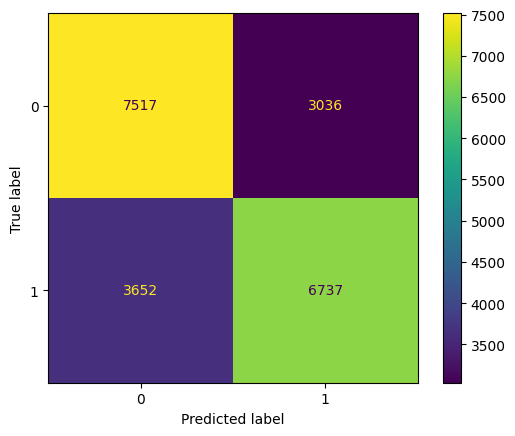

In [ ]:
testing_models.run_best_model(0)